In [1]:
import numpy as np
from numba.typed import List as NumbaList
from BPmodule.BPGen  import PROBLEM2,PROBLEM3,PROBLEM4,PROBLEM5,PROBLEM1
from BPnumba.GeneticOperators import CreateHeuristicPob,InstancePob,CrossOX,Hamming,InverseMutation
from BPnumba.DFFA import createDFFA,createEDFFA
import matplotlib.pyplot as plt

In [23]:
P1A1 = PROBLEM1[0]
P2A1 = PROBLEM2[0]
P2A2 = PROBLEM2[1]
P3A1 = PROBLEM3[0]
P3A2 = PROBLEM3[1]
P4A1 = PROBLEM4[0]
P4A2 = PROBLEM4[1]
P5A1 = PROBLEM5[0]
P5A2 = PROBLEM5[1]
contenedor =P3A2[0][0]
datos = P3A2[1]
n= len(datos)
n

50

In [24]:
pop= 50
initial = CreateHeuristicPob(pop,datos,True)
gamma= 1/n
maxItr=500

In [25]:
Pob = InstancePob(NumbaList(initial),datos,contenedor)

In [26]:
edffa = createEDFFA(gamma)

In [27]:
edffa.Train(maxItr,NumbaList(Pob.copy()),datos,contenedor)

In [28]:
edffa.BestInd.fi

1.0

In [30]:
edffa.bestfi

ListType[float64]([0.999694, 0.999694, 0.999868, 0.999868, 0.999868, 0.999948, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0

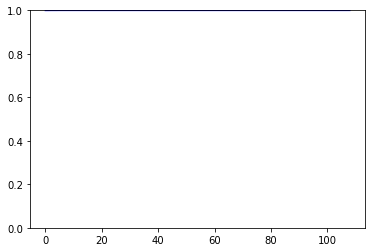

In [29]:
plt.figure()
plt.plot(edffa.bestfi,color='blue')
plt.ylim(0,1)
plt.show()